In [1]:
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

In [2]:
df_boomdata = pd.read_excel(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Grondradar\pixelcount.xlsx")
boomnummers = np.array(df_boomdata['Boomnummer'])
print(boomnummers)
df_boomdata['color'] = 'C0'
df_boomdata['color'][df_boomdata['shape'] == 'line'] = 'C1'

[ 1  2  3  4  5  6 10 11 12 13 14 15 16 17 18 19 20 21 22]


<ipython-input-2-825780b7e735>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boomdata['color'][df_boomdata['shape'] == 'line'] = 'C1'


In [3]:
detections_list = []
for n in boomnummers:
    df = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Grondradar\puntenselecties\boom{}.csv".format(n))
    
    # count detections in each ground layer
    rows_1 = len(df[df['Layer'] == 'Grondradar worteldetectie 0-30 cm'])
    rows_2 = len(df[df['Layer'] == 'Grondradar worteldetectie 30-60 cm'])
    rows_3 = len(df[df['Layer'] == 'Grondradar worteldetectie 6-100 cm'])
    detections = rows_1 + rows_2 + rows_3
    detections_list.append(detections)

In [4]:
volume_centraal_static = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\root_model\output\numpy_files\Centraal_static_volume.npy")[0]
volume_centraal_treedict = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\root_model\output\numpy_files\Centraal_treedict_volume.npy")[0]
volume_centraal_treegrowth = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\root_model\output\numpy_files\Centraal_treegrowth_volume.npy")[0]
optimal_static = volume_centraal_static.T[0]
df_boomdata['static'] = optimal_static
optimal_treedict = volume_centraal_treedict.T[0]
df_boomdata['treedict'] = optimal_treedict
optimal_treegrowth = volume_centraal_treegrowth.T[0]
df_boomdata['treegrowth'] = optimal_treegrowth

In [5]:
def plot(df, detections_list, model):
#     df.sort_values(by=model)
    plt.scatter(df[model], detections_list, color=df['color'])
        
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='C0', label='circular scan'),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='C1', label='linear scan'),
                    ]
    
    for i, txt in df.iterrows():
        plt.annotate(txt['Boomnummer'], (txt[model], detections_list[i]+3), fontsize=12)
    
    plt.xlabel('Estimated volume ($m^3$)', fontsize=14)
    plt.ylabel('Detection count', fontsize=14)
    plt.legend(handles=legend_elements)
    plt.tight_layout()
#     plt.ylim(10,140)
    plt.savefig('plots/groundradar_raw_{}'.format(model), dpi=300)
    plt.show()


[358, 309, 182, 309, 605, 600, 545, 744, 880, 251, 307, 96, 133, 126, 205, 204, 204, 212, 232]


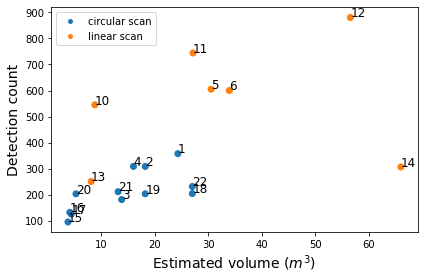

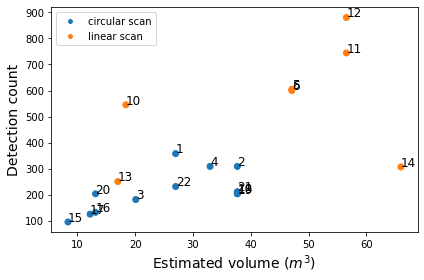

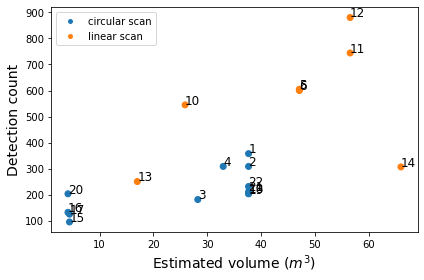

In [6]:
print(detections_list)
plot(df_boomdata, detections_list, 'static')
plot(df_boomdata, detections_list, 'treedict')
plot(df_boomdata, detections_list, 'treegrowth')
